<h1> Reto perfiles de suelo IGAC MODELS</h1>

<h2> Librerias a importar </h2>

In [22]:
import pandas              as pd # The gold standard of Python data analysis, to create and manipulate tables of data
import numpy               as np # The Python module for processing arrays which/Pandas is based on
import matplotlib.pyplot   as plt # The gold standard of Python data visualization, but can be complex to use
import seaborn             as sns; sns.set() # A package to make Matplotlib visualizations more aesthetic
import statsmodels.api         as sm
import statsmodels.formula.api as smf
import os

<h2> Carga de datos <h3>

In [23]:
bdl_det = pd.read_csv('datos_limpios\BDL_DETALLADA.csv', encoding='latin-1')
bdp_det = pd.read_csv('datos_limpios\BDP_DETALLADA.csv',encoding='latin-1')
bdp_gen = pd.read_csv('datos_limpios\BDP_GENERAL.csv',encoding='latin-1')

<h2>Merging of the data</h2>


In [24]:
merged=  pd.merge(bdl_det, bdp_det, on='COD_PERFIL', how= 'inner', suffixes=('', '_y'))
merged.drop(merged.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

In [4]:
merged=pd.merge(merged, bdp_gen, on ='COD_PERFIL', how= 'inner', suffixes=('', '_y'))
merged.drop(merged.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

In [5]:
pd.set_option('display.max_columns', None)

<h2>Selección BD con variables de interes para IGAC</h2>

In [25]:
variables_descrip= ['Horizonte','SIMBOLO_UCS','TIPO_UCS','DEPARTAMENTO', 'CLASE_PENDIENTE','PORC_PENDIENTE',
                    'LONGITUD_PENDIENTE', 'FORMA_PENDIENTE','REGIMEN_HUMEDAD', 'CLASE_EROSION', 
                    'TIPO_EROSION', 'GRADO_EROSION','DRENAJE_INTERNO','DRENAJE_EXTERNO', 
                    'DRENAJE_NATURAL','PROFUNDIDAD_EFECTIVA','TIPO_PEDREGOSIDAD''PORC_PEDREGOSIDAD_SUPERFICIAL_CUBIERTA'
                    'CLASE_PEDREGOSIDAD', 'FASE_INUNDACION_ENCHARCAMIENTO','FRECUENCIA_INUNDACION',
                    'DURACION_INUNDACION','FRECUENCIA_ENCHARCAMIENTO','DURACION_ENCHARCAMIENTO','CARACTERISTICAS_DIAGNOSTICAS',
                    'CLASIFICACION_TAXONOMICA','FAMILIA_TEXTURAL','EPIPEDON','ENDOPEDON_1','ENDOPEDON_2','COD_PERFIL', 'SIMBOLO_UCS', 'TIPO_UCS', 'DEPARTAMENTO', 'CLASE_PENDIENTE', 'PORC_PENDIENTE', 'LONGITUD_PENDIENTE', 
               'FORMA_PENDIENTE', 'REGIMEN_HUMEDAD', 'CLASE_EROSION', 'TIPO_EROSION', 'GRADO_EROSION', 'DRENAJE_INTERNODREN',
               'COLOR_MATRIZ_SECO1', 'COLOR_MATRIZ_SECO2', 'COLOR_MATRIZ_HUMEDO1', 'COLOR_MATRIZ_HUMEDO2', 'CONSISTENCIA_SECO',
               'CONSISTENCIA_HÃšMEDO', 'CONSIST_MOJADO_PEGJ', 'CONSIST_MOJADO_PL', 'CLASE_EROSION', 'TIPO_EROSION', 'GRADO_EROSION', 
               'EVIDENCIAS_EROSION', 'ESPESOR', 'FASE_desp_fam_text']


In [26]:
variables_lab= ['LATITUD_y', 'LONGITUD_y', 'MEMORIA', 'COD_PERFIL','Horizonte,''Clase Textural', 'CARBONO ORGANICO (CO %)','pH (1:1)', 
                'pH (1:5)', 'CICA','CICE', 'CICV', 'ALUMINIO ACTIVO %', 
                '0(kPa)','-33(kPa)', '-100(kPa)','-500(kPa)','-1000(kPa)','-1500(kPa)', 'REAL (g/cm3)',
                'APARENTE(g/cm3)',' FÃ“SFORO DISPONIBLE', 'Porosidad Total (%)']

In [8]:
all_varriables= ['LATITUD_y', 'LONGITUD_y', 'MEMORIA', 'COD_PERFIL','COD_PERFIL_HOR','Horizonte,','Clase Textural', 'CARBONO ORGANICO (CO %)','pH (1:1)', 
                'pH (1:5)', 'CICA','CICE', 'CICV', 'ALUMINIO ACTIVO %', 
                '0(kPa)','-33(kPa)', '-100(kPa)','-500(kPa)','-1000(kPa)','-1500(kPa)', 'REAL (g/cm3)',
                'APARENTE(g/cm3)',' FÃ“SFORO DISPONIBLE', 'Porosidad Total (%)','SIMBOLO_UCS','TIPO_UCS','DEPARTAMENTO', 
                'CLASE_PENDIENTE','PORC_PENDIENTE', 'LONGITUD_PENDIENTE', 'FORMA_PENDIENTE','REGIMEN_HUMEDAD', 'CLASE_EROSION', 
                'TIPO_EROSION', 'GRADO_EROSION','DRENAJE_INTERNO','DRENAJE_EXTERNO', 'DRENAJE_NATURAL',
                'PROFUNDIDAD_EFECTIVA','TIPO_PEDREGOSIDAD''PORC_PEDREGOSIDAD_SUPERFICIAL_CUBIERTA', 
                'CLASE_PEDREGOSIDAD', 'FASE_INUNDACION_ENCHARCAMIENTO','FRECUENCIA_INUNDACION',
                'DURACION_INUNDACION','FRECUENCIA_ENCHARCAMIENTO','DURACION_ENCHARCAMIENTO','CARACTERISTICAS_DIAGNOSTICAS',
                'CLASIFICACION_TAXONOMICA','FAMILIA_TEXTURAL','EPIPEDON','ENDOPEDON_1','ENDOPEDON_2','COD_PERFIL', 'SIMBOLO_UCS',
                 'TIPO_UCS', 'DEPARTAMENTO', 'CLASE_PENDIENTE', 'PORC_PENDIENTE', 'LONGITUD_PENDIENTE', 
               'FORMA_PENDIENTE', 'REGIMEN_HUMEDAD', 'CLASE_EROSION', 'TIPO_EROSION', 'GRADO_EROSION', 'DRENAJE_INTERNODREN',
               'COLOR_MATRIZ_SECO1', 'COLOR_MATRIZ_SECO2', 'COLOR_MATRIZ_HUMEDO1', 'COLOR_MATRIZ_HUMEDO2', 'CONSISTENCIA_SECO',
               'CONSISTENCIA_HÃšMEDO', 'CONSIST_MOJADO_PEGJ', 'CONSIST_MOJADO_PL', 'CLASE_EROSION', 'TIPO_EROSION', 'GRADO_EROSION', 
               'EVIDENCIAS_EROSION', 'ESPESOR', 'FASE_desp_fam_text']

In [27]:
all_selected= merged[merged.columns.intersection(all_varriables)]

In [28]:
all_selected = all_selected.loc[:,~all_selected.columns.duplicated()]

<h2> Rename columns </h2>

In [30]:
new_col_names= ['MEMORIA', 'COD_PERFIL', 'COD_PERFIL_HOR', 'pH_1',
       'CO', 'CICA', 'CICE', 'CICV', 'APARENTE',
       'REAL', '0', '-33', '-100','-500', '-1500', 
        'Porosidad_Total', 'Clase_Textural', 'DEPARTAMENTO',
       'SIMBOLO_UCS', 'TIPO_UCS', 'CLASE_PENDIENTE', 'PORC_PENDIENTE',
       'LONGITUD_PENDIENTE', 'FORMA_PENDIENTE', 'REGIMEN_HUMEDAD',
       'CLASE_EROSION', 'TIPO_EROSION', 'GRADO_EROSION', 'EVIDENCIAS_EROSION',
       'DRENAJE_INTERNO', 'DRENAJE_EXTERNO', 'DRENAJE_NATURAL',
       'PROFUNDIDAD_EFECTIVA', 'CLASE_PEDREGOSIDAD',
       'FASE_INUNDACION_ENCHARCAMIENTO', 'FRECUENCIA_INUNDACION',
       'DURACION_INUNDACION', 'FRECUENCIA_ENCHARCAMIENTO',
       'DURACION_ENCHARCAMIENTO', 'CARACTERISTICAS_DIAGNOSTICAS', 'EPIPEDON',
       'ENDOPEDON_1', 'ENDOPEDON_2', 'CLASIFICACION_TAXONOMICA',
       'FAMILIA_TEXTURAL', 'FASE_desp_fam_text', 'ESPESOR',
       'COLOR_MATRIZ_SECO1', 'COLOR_MATRIZ_SECO2', 'COLOR_MATRIZ_HUMEDO1',
       'COLOR_MATRIZ_HUMEDO2', 'CONSISTENCIA_SECO', 'CONSIST_MOJADO_PEGJ',
       'CONSIST_MOJADO_PL']

In [31]:
all_selected.columns = new_col_names

<h2> Manejo texto </h2>

In [75]:
objects= ['Clase_Textural', 'DEPARTAMENTO', 'SIMBOLO_UCS',
       'TIPO_UCS', 'CLASE_PENDIENTE', 'PORC_PENDIENTE', 'LONGITUD_PENDIENTE',
       'FORMA_PENDIENTE', 'REGIMEN_HUMEDAD', 'CLASE_EROSION', 'TIPO_EROSION',
       'GRADO_EROSION', 'EVIDENCIAS_EROSION', 'DRENAJE_INTERNO',
       'DRENAJE_EXTERNO', 'DRENAJE_NATURAL', 'PROFUNDIDAD_EFECTIVA',
       'CLASE_PEDREGOSIDAD', 'FASE_INUNDACION_ENCHARCAMIENTO',
       'FRECUENCIA_INUNDACION', 'DURACION_INUNDACION',
       'FRECUENCIA_ENCHARCAMIENTO', 'DURACION_ENCHARCAMIENTO',
       'CARACTERISTICAS_DIAGNOSTICAS', 'EPIPEDON', 'ENDOPEDON_1',
       'ENDOPEDON_2', 'CLASIFICACION_TAXONOMICA', 'FAMILIA_TEXTURAL',
       'FASE_desp_fam_text', 'ESPESOR', 'COLOR_MATRIZ_SECO1',
       'COLOR_MATRIZ_SECO2', 'COLOR_MATRIZ_HUMEDO1', 'COLOR_MATRIZ_HUMEDO2',
       'CONSISTENCIA_SECO', 'CONSIST_MOJADO_PEGJ', 'CONSIST_MOJADO_PL']

In [87]:
all_selected=all_selected.apply(lambda x: x.astype(str).str.upper())

<h2>Numerical columns as numeric</h2>

In [93]:
all_selected[['pH_1',
       'CO', 'CICA', 'CICE', 'CICV',
       'APARENTE', 'REAL', '0', '-33', '-100',
       '-500', '-1500', 'Porosidad_Total']]= all_selected[['pH_1',
       'CO', 'CICA', 'CICE', 'CICV', 'APARENTE',
       'REAL', '0', '-33', '-100','-500', '-1500', 
        'Porosidad_Total']].apply(pd.to_numeric, errors='coerce')

<h2>Linear Models </h2>

In [95]:
np.random.seed()
ndata = len(all_selected)

idx_train = np.random.choice(range(ndata),int(0.8*ndata),replace=False)
idx_test  = np.asarray(list(set(range(ndata)) - set(idx_train)))
train     = all_selected.iloc[idx_train] 
test      = all_selected.iloc[idx_test]  
print(train.shape) 
print(test.shape) 

(17371, 54)
(4343, 54)


ValueError: Could not interpret input 'ALUMINIO_ACTIVO'

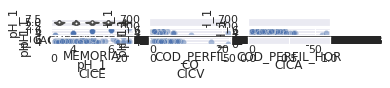

In [96]:
variables = ['MEMORIA', 'COD_PERFIL', 'COD_PERFIL_HOR', 'pH_1', 'CO', 'CICA',
       'CICE', 'CICV', 'APARENTE', 'REAL', '0', '-33',
       '-100', '-500', '-1500', 'Porosidad_Total', 'Clase_Textural',
       'DEPARTAMENTO', 'SIMBOLO_UCS', 'TIPO_UCS', 'CLASE_PENDIENTE',
       'PORC_PENDIENTE', 'LONGITUD_PENDIENTE', 'FORMA_PENDIENTE',
       'REGIMEN_HUMEDAD', 'CLASE_EROSION', 'TIPO_EROSION', 'GRADO_EROSION',
       'EVIDENCIAS_EROSION', 'DRENAJE_INTERNO', 'DRENAJE_EXTERNO',
       'DRENAJE_NATURAL', 'PROFUNDIDAD_EFECTIVA', 'CLASE_PEDREGOSIDAD',
       'FASE_INUNDACION_ENCHARCAMIENTO', 'FRECUENCIA_INUNDACION',
       'DURACION_INUNDACION', 'FRECUENCIA_ENCHARCAMIENTO',
       'DURACION_ENCHARCAMIENTO', 'CARACTERISTICAS_DIAGNOSTICAS', 'EPIPEDON',
       'ENDOPEDON_1', 'ENDOPEDON_2', 'CLASIFICACION_TAXONOMICA',
       'FAMILIA_TEXTURAL', 'FASE_desp_fam_text', 'ESPESOR',
       'COLOR_MATRIZ_SECO1', 'COLOR_MATRIZ_SECO2', 'COLOR_MATRIZ_HUMEDO1',
       'COLOR_MATRIZ_HUMEDO2', 'CONSISTENCIA_SECO', 'CONSIST_MOJADO_PEGJ',
       'CONSIST_MOJADO_PL'] 
plt.figure(figsize=(60,60))
for i,var in enumerate(variables):
    plt.subplot(30,3,i+1)
    if var in ['pH_1',
       'CO', 'CICA', 'CICE', 'CICV',
       'APARENTE', 'REAL', '0', '-33', '-100',
       '-500', '-1000', '-1500', 'Porosidad_Total']:
        sns.scatterplot(x=var, y= 'pH_1', data=all_selected, alpha=0.1)   
    elif var in ['MEMORIA', 'Clase_Textural',
       'DEPARTAMENTO', 'SIMBOLO_UCS', 'TIPO_UCS', 'CLASE_PENDIENTE',
       'PORC_PENDIENTE', 'LONGITUD_PENDIENTE', 'FORMA_PENDIENTE',
       'REGIMEN_HUMEDAD', 'CLASE_EROSION', 'TIPO_EROSION', 'GRADO_EROSION',
       'EVIDENCIAS_EROSION', 'DRENAJE_INTERNO', 'DRENAJE_EXTERNO',
       'DRENAJE_NATURAL', 'PROFUNDIDAD_EFECTIVA', 'CLASE_PEDREGOSIDAD',
       'FASE_INUNDACION_ENCHARCAMIENTO', 'FRECUENCIA_INUNDACION',
       'DURACION_INUNDACION', 'FRECUENCIA_ENCHARCAMIENTO',
       'DURACION_ENCHARCAMIENTO', 'CARACTERISTICAS_DIAGNOSTICAS', 'EPIPEDON',
       'ENDOPEDON_1', 'ENDOPEDON_2', 'CLASIFICACION_TAXONOMICA',
       'FAMILIA_TEXTURAL', 'FASE_desp_fam_text', 'ESPESOR',
       'COLOR_MATRIZ_SECO1', 'COLOR_MATRIZ_SECO2', 'COLOR_MATRIZ_HUMEDO1',
       'COLOR_MATRIZ_HUMEDO2', 'CONSISTENCIA_SECO', 'CONSIST_MOJADO_PEGJ',
       'CONSIST_MOJADO_PL']:
        sns.violinplot(x=var,y='pH_1',data=all_selected, alpha=0.10) 
    else:
        plt.ylim(600,700)
        sns.barplot(x=var, y= 'pH_1', data=all_selected)
        

In [57]:
##LONGITUD_PENDIENTE problemas 
#Clase pendiente se puede transformar a quebrada, inclunada, ondulada, plana

In [71]:
train.DURACION_INUNDACION.unique()

array(['Frecuente', nan, 'Rara', 'Ocasional', 'No hay', 'Muy frecuente',
       'frecuente'], dtype=object)

In [107]:
train.COLOR_MATRIZ_HUMEDO1.value_counts()

NAN           5503
10YR5/6        786
7.5YR5/6       704
10YR4/4        610
10YR4/3        434
10YR4/6        410
7.5YR5/8       399
10YR5/4        386
5YR5/8         364
10YR3/2        362
5YR5/6         319
10YR5/8        290
10YR4/2        270
5Y6/1          254
10YR6/8        251
10YR6/6        227
10YR3/3        208
2.5Y7/1        184
7.5YR4/6       172
5Y5/1          165
7.5YR4/4       162
2.5Y5/2        149
5YR4/6         142
5Y7/1          138
10YR5/2        137
2.5YR5/8       137
10YR3/4        135
2.5Y7/2        129
10YR5/3        124
10YR8/1        110
              ... 
5YR6/3           5
5Y4/3            5
5Y2.5/1          5
10YR8/3          5
5Y5/6            5
5YR2.5/1         5
10R3/2           5
7.5YR6/2         5
5R5/6            5
2.5YR6/8         5
5YR6/4           5
5BG5/1           5
2.5YR2.5/1       4
5YR/6            4
2.5YR2.5/2       4
10YR2/3          4
5YR2.5/2         4
7.5YR7/1         4
2.5YR7/2         4
N2.5             4
2.5YR6/1         4
2.5YR4/3    

Variables ordinales:
    LONGITUD_PENDIENTE: Larga 100 - 300 metros, Corta < 50 metros, Media 50 - 100 metros,Corta <50 metros,Muy larga > 300 metros
    DRENAJE_INTERNO y DRENAJE_EXTERNO: Moderado, Lento, Rápido, Muy lento, Muy rápido.
    DRENAJE_NATURAL: Muy pobre', 'Bien drenado', 'Pobre', 'Imperfecto',
       'Moderadamente bien drenado', 'Excesivo', 'imperfecto', nan,
       'Moderado', 'Moderadamente excesivo'
    PROFUNDIDAD_EFECTIVA: 'Muy superficial (< 25cm)', 'Profunda (100cm - 150cm)',
       'Moderadamente profunda (75cm - 100cm)', 'Muy profunda (>150cm)',
       'Superficial (25cm - 50cm)', 'Profunda (100cm - 150cm) ',
       'Moderadamente superficial (50cm - 75cm)', nan,
       'Muy profunda (> 150cm)'
    CLASE_PEDREGOSIDAD: nan, 'No hay', '  ', 'Abundante', 'Poca', 'Mediana',
       'Muy abundante', 'Abundnte'
    FRECUENCIA_INUNDACION: Frecuente', nan, 'Rara', 'Ocasional', 'No hay', 'Muy frecuente',
       'frecuente'
    DURACION_INUNDACION: Frecuente', nan, 'Rara', 'Ocasional', 'No hay', 'Muy frecuente',
       'frecuente
    
    
    

In [ ]:
Clase_Textural+DEPARTAMENTO+SIMBOLO_UCS+TIPO_UCS+CLASE_PENDIENTE+PORC_PENDIENTE+LONGITUD_PENDIENTE+
FORMA_PENDIENTE+REGIMEN_HUMEDAD+CLASE_EROSION+TIPO_EROSION+GRADO_EROSION+EVIDENCIAS_EROSION+
DRENAJE_INTERNO+ DRENAJE_EXTERNO+DRENAJE_NATURAL+ PROFUNDIDAD_EFECTIVA+CLASE_PEDREGOSIDAD+
FASE_INUNDACION_ENCHARCAMIENTO+,FRECUENCIA_INUNDACION+DURACION_INUNDACION+FRECUENCIA_ENCHARCAMIENTO+
DURACION_ENCHARCAMIENTO+CARACTERISTICAS_DIAGNOSTICAS+EPIPEDON+ENDOPEDON_1+ENDOPEDON_2+CLASIFICACION_TAXONOMICA+
FAMILIA_TEXTURAL+ FASE_desp_fam_text+ ESPESOR+COLOR_MATRIZ_SECO1#no sirve#+COLOR_MATRIZ_SECO2+ COLOR_MATRIZ_HUMEDO1+
COLOR_MATRIZ_HUMEDO2+ CONSISTENCIA_SECO+ CONSIST_MOJADO_PEGJ+CONSIST_MOJADO_PL

In [108]:
model_all = smf.ols(formula = """pH_1 ~ Clase_Textural+CLASE_PENDIENTE+DEPARTAMENTO+TIPO_UCS+CLASE_EROSION+
                                 CARACTERISTICAS_DIAGNOSTICAS+ CLASIFICACION_TAXONOMICA+COLOR_MATRIZ_HUMEDO1""", 
                    data = train).fit()

In [109]:
model_all.summary()

/opt/conda/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1549: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/conda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1558: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/opt/conda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:1181: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pH_1   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -0.000
Date:                Fri, 30 Oct 2020   Prob (F-statistic):                nan
Time:                        17:01:34   Log-Likelihood:                 98.067
No. Observations:                   3   AIC:                            -190.1
Df Residuals:                       0   BIC:                            -192.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================================================================================================================================================
                                                                                                                                                                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                                                                                             0.6818        inf          0        nan         nan         nan
Clase_Textural[T.FA]                                                                                                                                                              -1.528e-17        inf         -0        nan         nan         nan
Clase_Textural[T.FAR]                                                                                                                                                                      0        nan        nan        nan         nan         nan
Clase_Textural[T.FARA]                                                                                                                                                                     0        nan        nan        nan         nan         nan
CLASE_PENDIENTE[T.FUERTEMENTE ESCARPADA O F. EMPINADA]                                                                                                                                     0        nan        nan        nan         nan         nan
CLASE_PENDIENTE[T.FUERTEMENTE INCLINADA]                                                                                                                                                   0        nan        nan        nan         nan         nan
CLASE_PENDIENTE[T.FUERTEMENTE ONDULADA]                                                                                                                                                    0        nan        nan        nan         nan         nan
CLASE_PENDIENTE[T.FUERTEMENTE QUEBRADA]                                                                                                                                                    0        nan        nan        nan         nan         nan
CLASE_PENDIENTE[T.LIGERAMENTE ESCARPADA O L. EMPINADA]                                                                                                                                     0        nan        nan        nan         nan         nan
CLASE_PENDIENTE[T.LIGERAMENTE INCLINADA]                                                                                           

In [42]:
lab_selected.drop(lab_selected.index[lab_selected['CICA'] == 'N/M'], inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [ ]:
varstolook = ["Units", "District", "Year_Built", "Fin_sqft", "Bdrms", "Sale_date"]
data_clean2=data_clean.copy()
data_clean2['log(price per sqrft)']=np.log(data_clean["Sale_price"] / data_clean["Fin_sqft"])
plt.figure(figsize=(18,10))
for i,var in enumerate(varstolook):
    plt.subplot(2,3,i+1)
    if var in ['Units','District','Bdrms']:
        sns.violinplot(x=var, y='log(price per sqrft)', data=data_clean2)
    else:
        sns.scatterplot(x=var,y='log(price per sqrft)',data=data_clean2, alpha=0.10,color='b')

In [34]:
all_selected.columns

Index(['MEMORIA', 'COD_PERFIL', 'COD_PERFIL_HOR', 'pH_1', 'pH_5', 'CO', 'CICA',
       'CICE', 'CICV', 'ALUMINIO_ACTIVO', 'APARENTE', 'REAL', '0', '-33',
       '-100', '-500', '-1000', '-1500', 'Porosidad_Total', 'Clase_Textural',
       'DEPARTAMENTO', 'SIMBOLO_UCS', 'TIPO_UCS', 'CLASE_PENDIENTE',
       'PORC_PENDIENTE', 'LONGITUD_PENDIENTE', 'FORMA_PENDIENTE',
       'REGIMEN_HUMEDAD', 'CLASE_EROSION', 'TIPO_EROSION', 'GRADO_EROSION',
       'EVIDENCIAS_EROSION', 'DRENAJE_INTERNO', 'DRENAJE_EXTERNO',
       'DRENAJE_NATURAL', 'PROFUNDIDAD_EFECTIVA', 'CLASE_PEDREGOSIDAD',
       'FASE_INUNDACION_ENCHARCAMIENTO', 'FRECUENCIA_INUNDACION',
       'DURACION_INUNDACION', 'FRECUENCIA_ENCHARCAMIENTO',
       'DURACION_ENCHARCAMIENTO', 'CARACTERISTICAS_DIAGNOSTICAS', 'EPIPEDON',
       'ENDOPEDON_1', 'ENDOPEDON_2', 'CLASIFICACION_TAXONOMICA',
       'FAMILIA_TEXTURAL', 'FASE_desp_fam_text', 'ESPESOR',
       'COLOR_MATRIZ_SECO1', 'COLOR_MATRIZ_SECO2', 'COLOR_MATRIZ_HUMEDO1',
       'COLOR_M

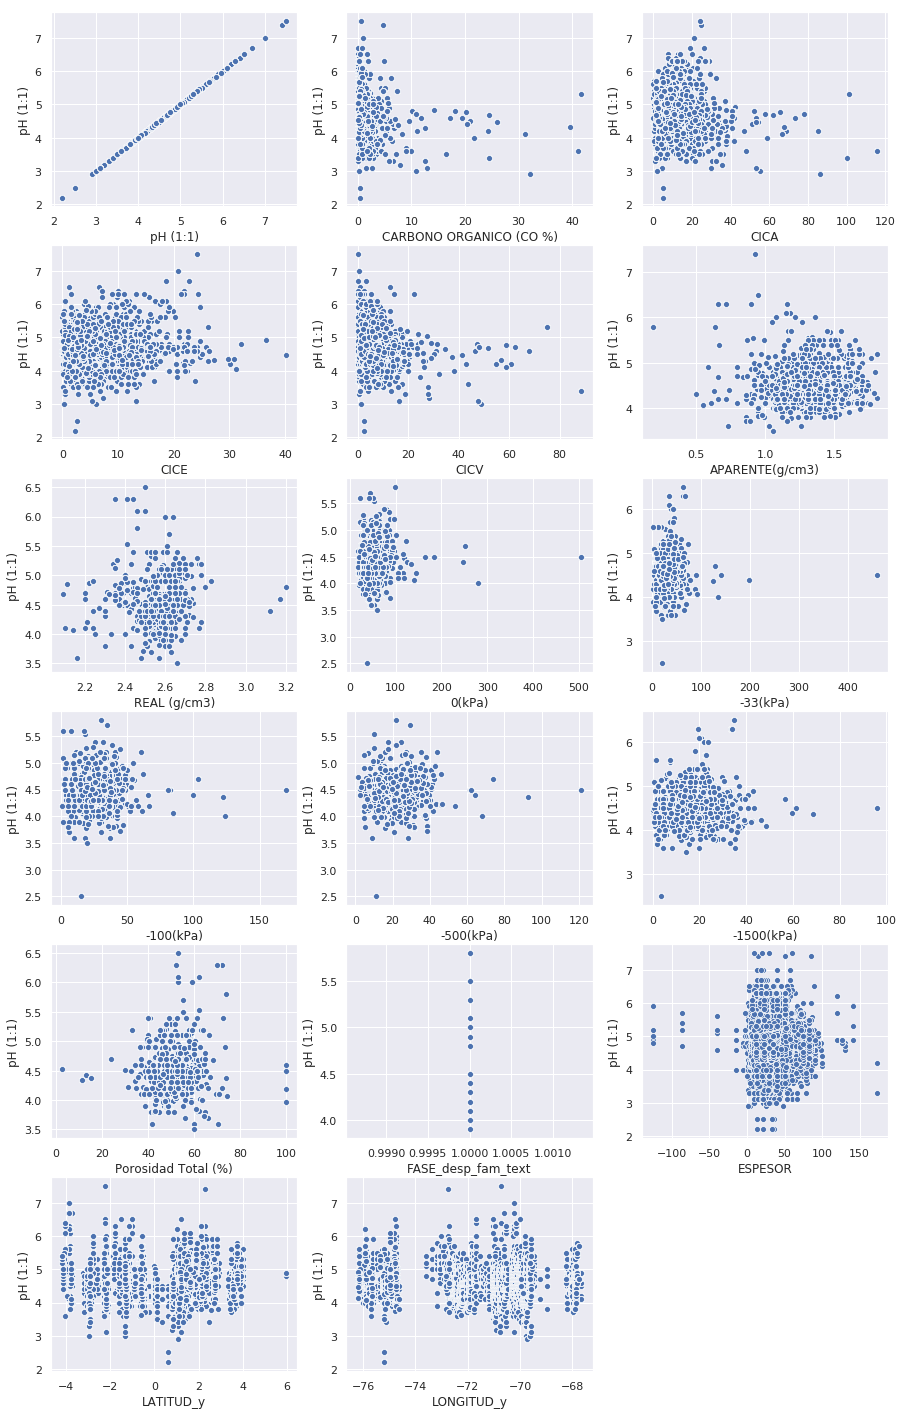

In [196]:
plt.figure(figsize=(15,25))
for i,var in enumerate(variables):
    plt.subplot(6,3,i+1)
    if var in ['pH (1:1)', 'CARBONO ORGANICO (CO %)', 'CICA', 'CICE', 'CICV', 'APARENTE(g/cm3)', 
               'REAL (g/cm3)', '0(kPa)', '-33(kPa)', '-100(kPa)','-500(kPa)', '-1500(kPa)', 
              'Porosidad Total (%)', 'FASE_desp_fam_text', 'ESPESOR','LATITUD_y', 'LONGITUD_y']:
        sns.scatterplot(x=var, y= 'pH (1:1)', data=all_selected)    

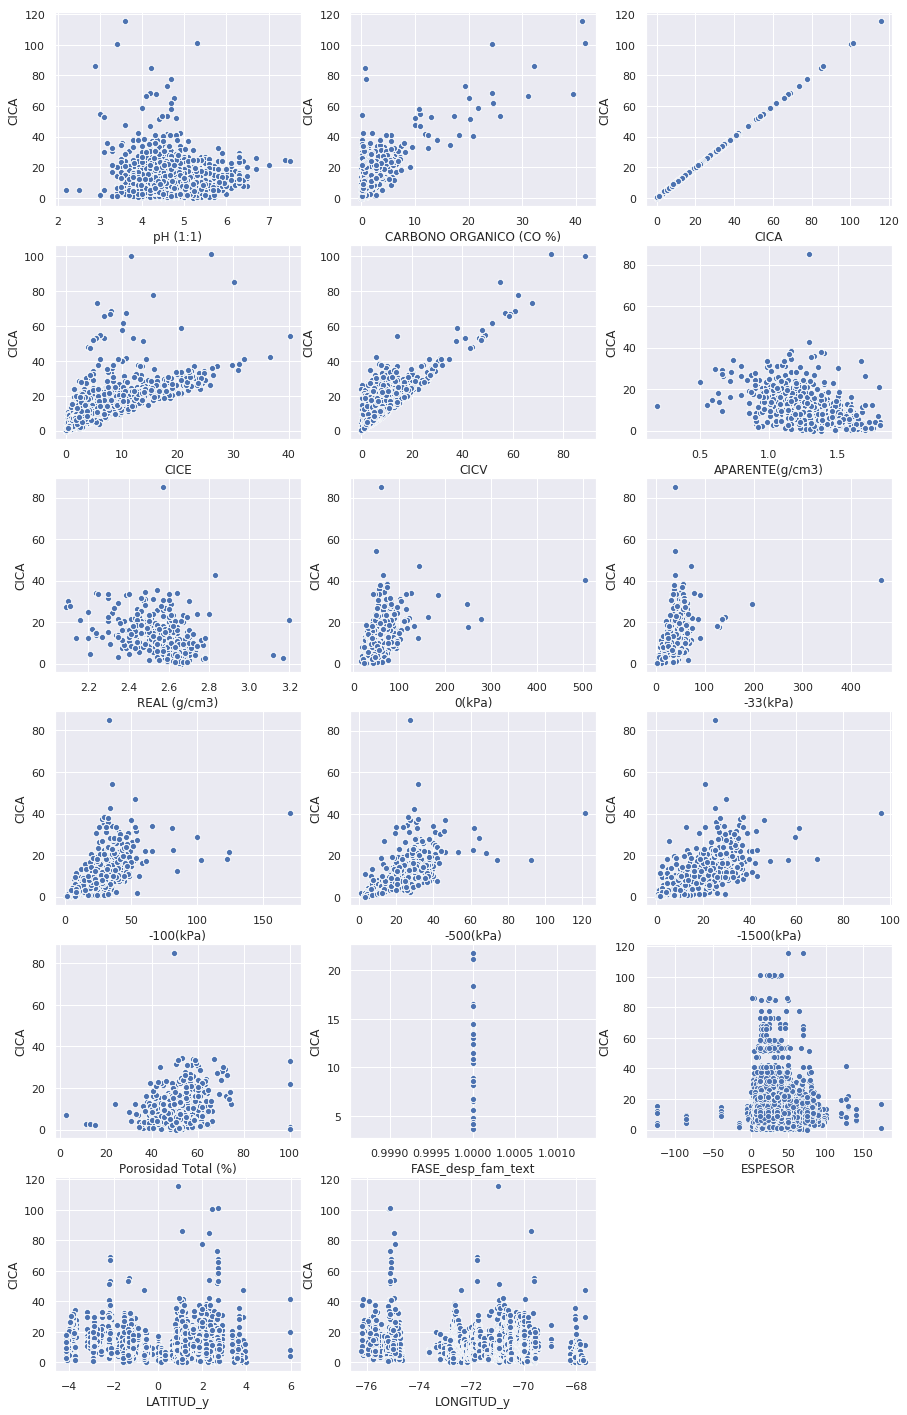

In [197]:
plt.figure(figsize=(15,25))
for i,var in enumerate(variables):
    plt.subplot(6,3,i+1)
    if var in ['pH (1:1)', 'CARBONO ORGANICO (CO %)', 'CICA', 'CICE', 'CICV', 'APARENTE(g/cm3)', 
               'REAL (g/cm3)', '0(kPa)', '-33(kPa)', '-100(kPa)','-500(kPa)', '-1500(kPa)', 
              'Porosidad Total (%)', 'FASE_desp_fam_text', 'ESPESOR','LATITUD_y', 'LONGITUD_y']:
        sns.scatterplot(x=var, y= 'CICA', data=all_selected)    

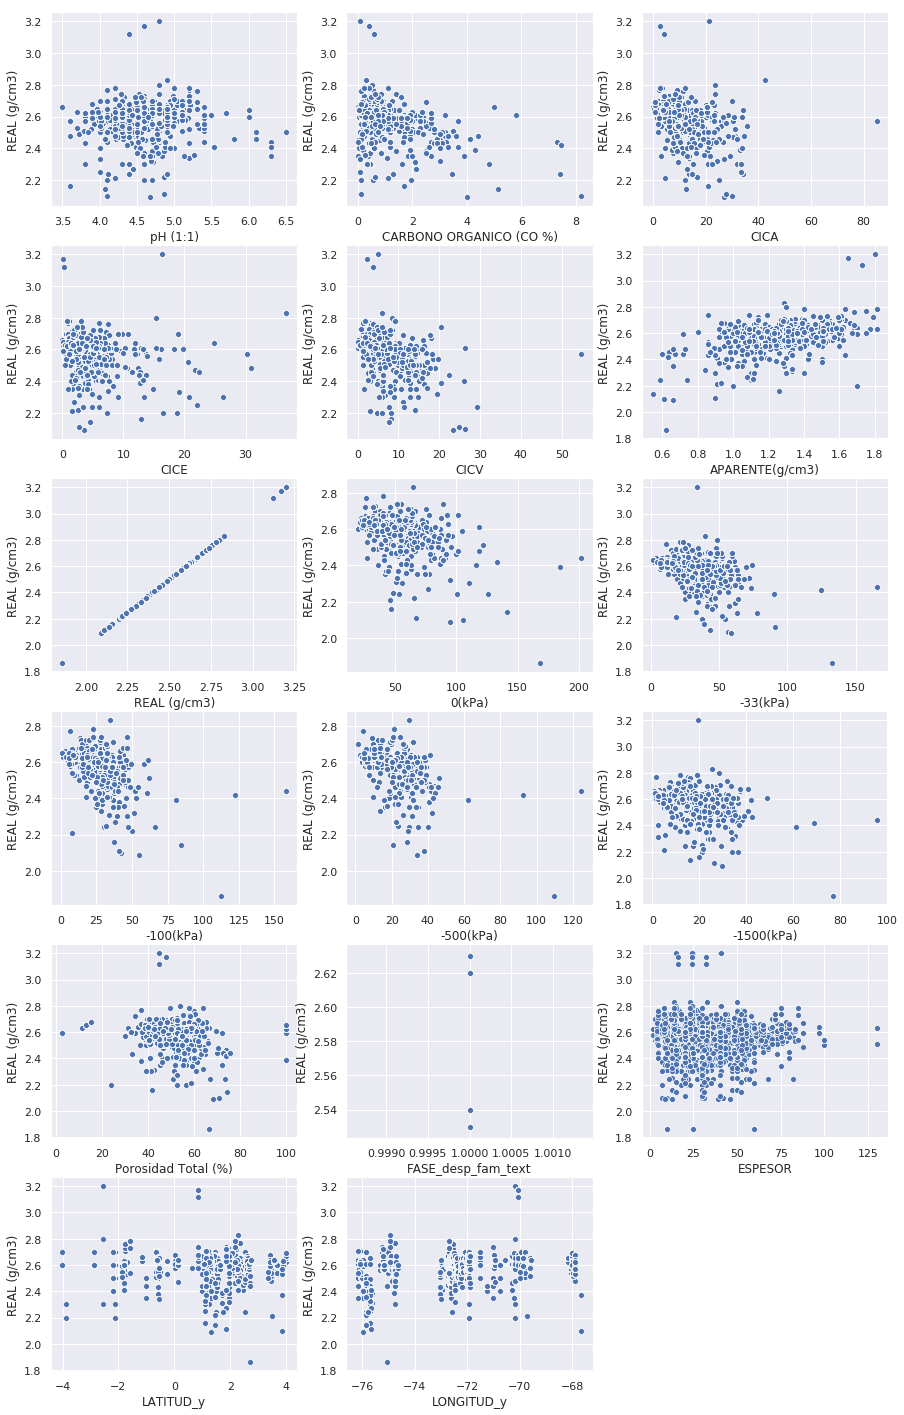

In [231]:
plt.figure(figsize=(15,25))
for i,var in enumerate(variables):
    plt.subplot(6,3,i+1)
    if var in ['pH (1:1)', 'CARBONO ORGANICO (CO %)', 'CICA', 'CICE', 'CICV', 'APARENTE(g/cm3)', 
               'REAL (g/cm3)', '0(kPa)', '-33(kPa)', '-100(kPa)','-500(kPa)', '-1500(kPa)', 
              'Porosidad Total (%)', 'FASE_desp_fam_text', 'ESPESOR','LATITUD_y', 'LONGITUD_y']:
        sns.scatterplot(x=var, y= 'REAL (g/cm3)', data=all_selected)    

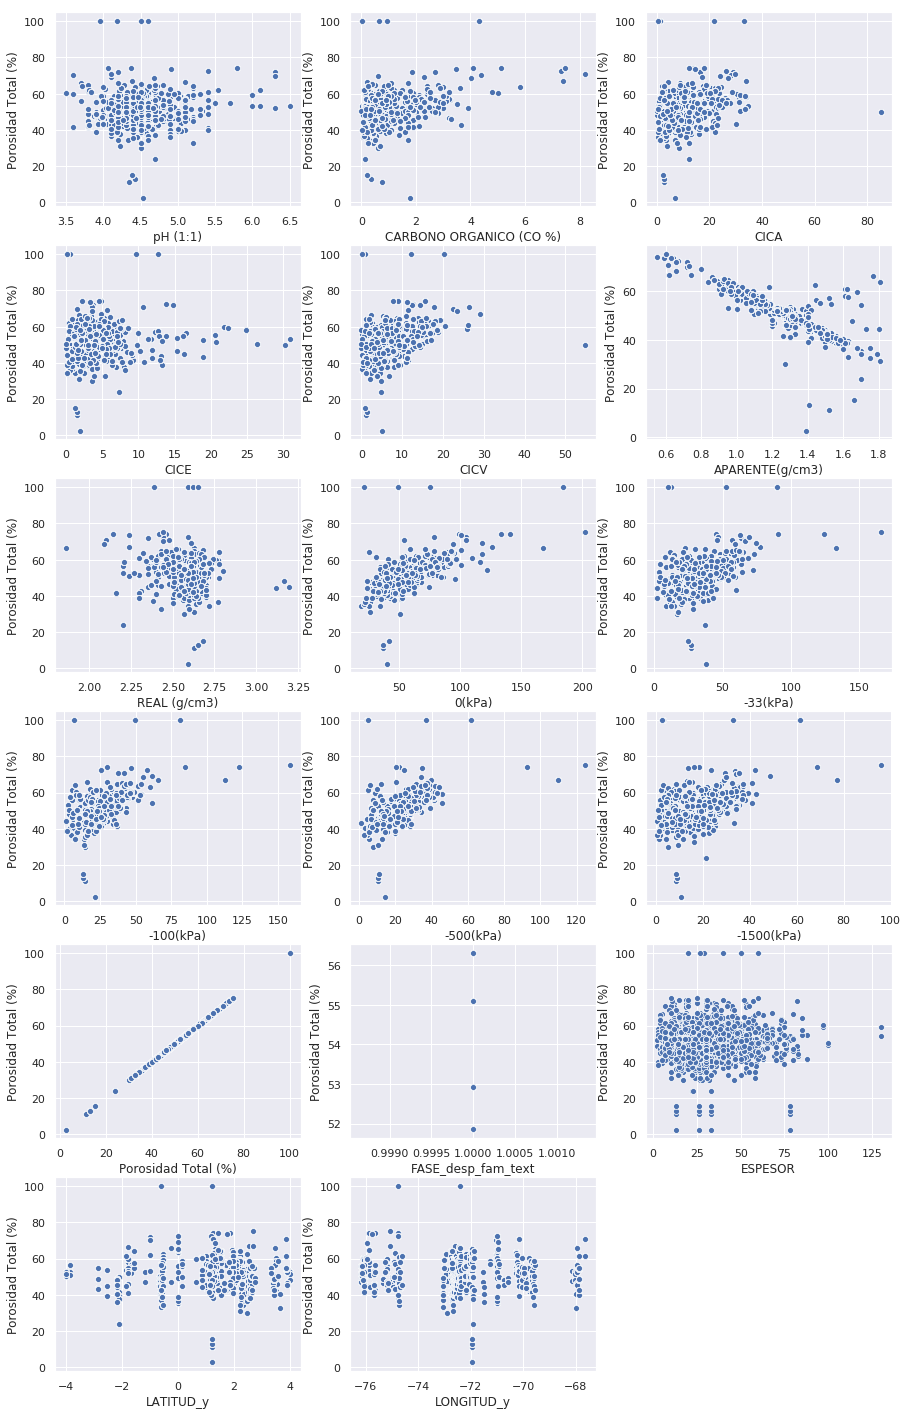

In [199]:
plt.figure(figsize=(15,25))
for i,var in enumerate(variables):
    plt.subplot(6,3,i+1)
    if var in ['pH (1:1)', 'CARBONO ORGANICO (CO %)', 'CICA', 'CICE', 'CICV', 'APARENTE(g/cm3)', 
               'REAL (g/cm3)', '0(kPa)', '-33(kPa)', '-100(kPa)','-500(kPa)', '-1500(kPa)', 
              'Porosidad Total (%)', 'FASE_desp_fam_text', 'ESPESOR','LATITUD_y', 'LONGITUD_y']:
        sns.scatterplot(x=var, y= 'Porosidad Total (%)', data=all_selected)    

In [42]:
indexNames = bdl_clean[(bdl_clean['pH (1:1)'] == 'N/M')].index

In [43]:
bdl_clean.drop(indexNames , inplace=True)

In [39]:
bdl_clean[].dropna(inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
ph_count

,pH,count
0,4.5,182
1,4.6,181
2,4.7,154
3,4.3,150
4,4.4,141
5,4.8,134
6,5,119
7,4.2,117
8,4.9,117
9,4.1,81


<function matplotlib.pyplot.close(*args)>

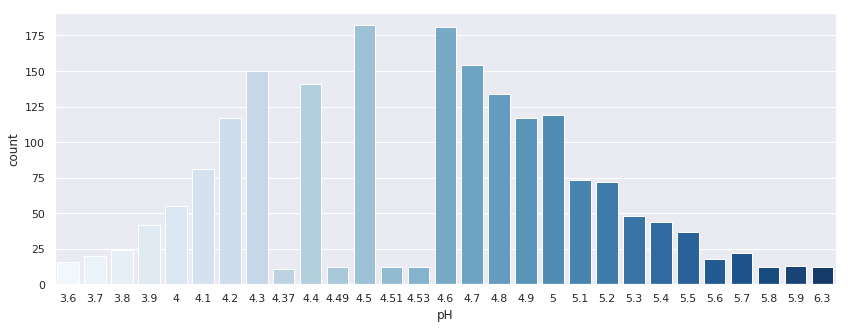

In [56]:
plt.figure (figsize=(14,5))
sns.barplot(x="pH", y="count",data=ph_count, palette='Blues')
plt.close

<h2> Análisis por departamento </h2>

<h3> DURACION_INUNDACION </h3>

In [57]:
bdp_gen_clean.DURACION_INUNDACION.unique()

array([nan, 'larga (de 7 a 30 dã\xadas)', 'corta (de 2 a 7 dã\xadas)',
       'muy corta (de 1 a 2 dã\xadas)',
       'extremadamente larga (de 90 a 180 dã\xadas)',
       'muy larga (de 30 a 90 dã\xadas)',
       'extremadamente corta (menor de 1 dã\xada)'], dtype=object)

In [58]:
count_dur = bdp_gen_clean.groupby(['DURACION_INUNDACION', 'DEPARTAMENTO']).size()

In [59]:
dur_inun= pd.DataFrame(count_dur).reset_index()

In [60]:
dur_inun

,DURACION_INUNDACION,DEPARTAMENTO,0
0,corta (de 2 a 7 dã­as),Amazonas,6
1,corta (de 2 a 7 dã­as),CaquetÃ¡,23
2,corta (de 2 a 7 dã­as),GuainÃ­a,2
3,corta (de 2 a 7 dã­as),Guaviare,8
4,corta (de 2 a 7 dã­as),VaupÃ©s,10
5,extremadamente corta (menor de 1 dã­a),Guaviare,1
6,extremadamente larga (de 90 a 180 dã­as),CaquetÃ¡,4
7,extremadamente larga (de 90 a 180 dã­as),Guaviare,4
8,larga (de 7 a 30 dã­as),Amazonas,35
9,larga (de 7 a 30 dã­as),CaquetÃ¡,30


In [61]:
dur_inun= dur_inun.rename(columns={0: "count"})

In [62]:
dur_inun['DURACION_INUNDACION']= dur_inun['DURACION_INUNDACION'].replace(['extremadamente corta (menor de 1 dã­a)',
                                                             'muy corta (de 1 a 2 dã­as)', 
                                                             'corta (de 2 a 7 dã­as)', 
                                                             'larga (de 7 a 30 dã­as)', 
                                                             'muy larga (de 30 a 90 dã­as)', 
                                                            'extremadamente larga (de 90 a 180 dã­as)'],
                                                            ['ext_corta','muy_corta','corta','larga', 'muy_larga', 'ext_larga'])

In [63]:
dur_inun.sort_values(by=['count'])

,DURACION_INUNDACION,DEPARTAMENTO,count
5,ext_corta,Guaviare,1
2,corta,GuainÃ­a,2
11,larga,Guaviare,2
12,larga,VaupÃ©s,2
13,muy_corta,CaquetÃ¡,2
10,larga,GuainÃ­a,3
14,muy_corta,Guaviare,3
6,ext_larga,CaquetÃ¡,4
7,ext_larga,Guaviare,4
15,muy_larga,GuainÃ­a,5


<function matplotlib.pyplot.close(*args)>

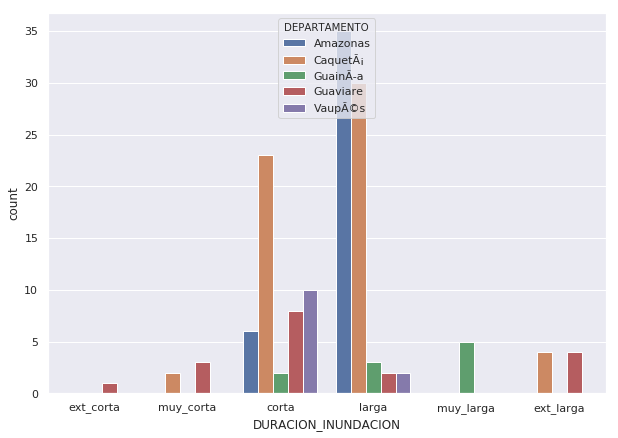

In [64]:
plt.figure (figsize=(10,7))
sns.barplot(x="DURACION_INUNDACION", y="count",data=dur_inun, 
            order= ['ext_corta','muy_corta','corta','larga', 'muy_larga', 'ext_larga'], 
            hue= 'DEPARTAMENTO')
plt.close

<function matplotlib.pyplot.close(*args)>

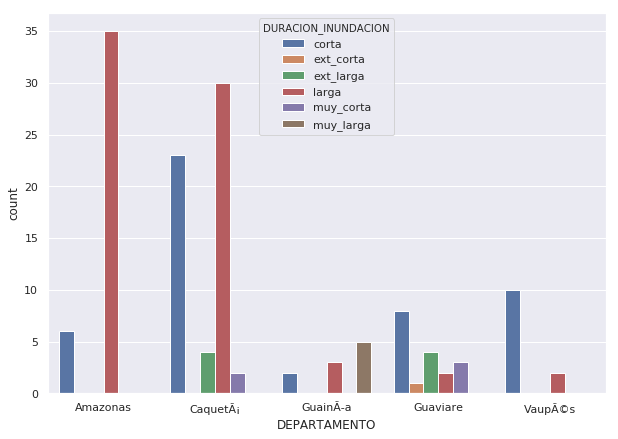

In [65]:
plt.figure (figsize=(10,7))
sns.barplot(x="DEPARTAMENTO", y="count",data=dur_inun, 
            hue= 'DURACION_INUNDACION')
plt.close

<h3>FRECUENCIA_ENCHARCAMIENTO</h3>

In [66]:
bdp_gen_clean.FRECUENCIA_ENCHARCAMIENTO.unique()

array([nan, 'Frecuente', 'Ocasional', 'Muy frecuente', 'Rara'], dtype=object)

In [67]:
count_freq = bdp_gen_clean.groupby(['FRECUENCIA_ENCHARCAMIENTO', 'DEPARTAMENTO']).size()

In [68]:
fre_ench= pd.DataFrame(count_freq).reset_index()

In [69]:
fre_ench= fre_ench.rename(columns={0: "count"})

In [70]:
fre_ench

,FRECUENCIA_ENCHARCAMIENTO,DEPARTAMENTO,count
0,Frecuente,CaquetÃ¡,19
1,Frecuente,GuainÃ­a,1
2,Frecuente,Guaviare,13
3,Frecuente,VaupÃ©s,1
4,Muy frecuente,CaquetÃ¡,5
5,Muy frecuente,Guaviare,1
6,Ocasional,CaquetÃ¡,10
7,Ocasional,Guaviare,4
8,Ocasional,VaupÃ©s,10
9,Rara,CaquetÃ¡,2


<function matplotlib.pyplot.close(*args)>

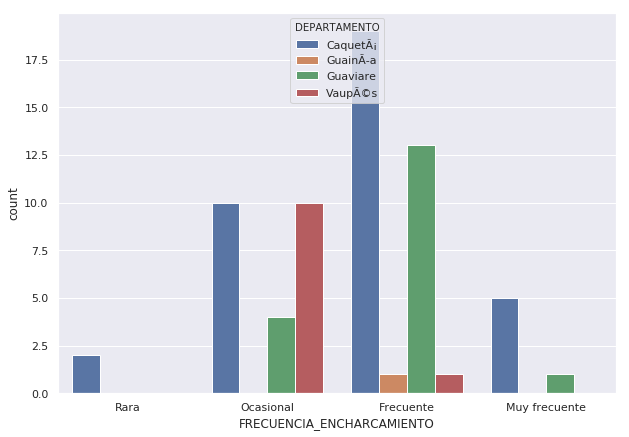

In [71]:
plt.figure (figsize=(10,7))
sns.barplot(x="FRECUENCIA_ENCHARCAMIENTO", y="count",data=fre_ench, 
            order= ['Rara' ,'Ocasional', 'Frecuente', 'Muy frecuente'], 
            hue='DEPARTAMENTO')
plt.close

<function matplotlib.pyplot.close(*args)>

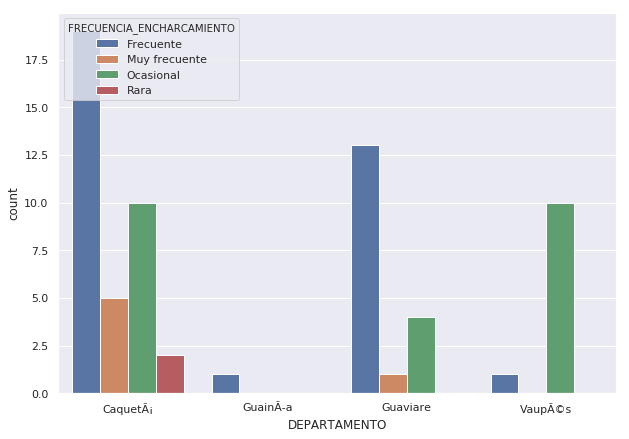

In [72]:
plt.figure (figsize=(10,7))
sns.barplot(x="DEPARTAMENTO", y="count",data=fre_ench,  
            hue='FRECUENCIA_ENCHARCAMIENTO')
plt.close

<h3> DURACION_ENCHARCAMIENTO </h3>

In [73]:
bdp_gen_clean.DURACION_ENCHARCAMIENTO.unique()

array([nan, 'corta (de 2 a 7 dã\xadas)', 'larga (de 7 a 30 dã\xadas)',
       'extremadamente larga (de 90 a 180 dã\xadas)', 'larga',
       'muy corta (de 1 a 2 dã\xadas)', 'corta'], dtype=object)

In [74]:
count_ench = bdp_gen_clean.groupby(['DURACION_ENCHARCAMIENTO', 'DEPARTAMENTO']).size()

In [75]:
dur_encha= pd.DataFrame(count_ench).reset_index()

In [76]:
dur_encha= dur_encha.rename(columns={0: "count"})

In [77]:
dur_encha

,DURACION_ENCHARCAMIENTO,DEPARTAMENTO,count
0,corta,VaupÃ©s,1
1,corta (de 2 a 7 dã­as),CaquetÃ¡,13
2,corta (de 2 a 7 dã­as),Guaviare,7
3,corta (de 2 a 7 dã­as),VaupÃ©s,10
4,extremadamente larga (de 90 a 180 dã­as),CaquetÃ¡,3
5,extremadamente larga (de 90 a 180 dã­as),Guaviare,3
6,larga,GuainÃ­a,1
7,larga (de 7 a 30 dã­as),CaquetÃ¡,20
8,larga (de 7 a 30 dã­as),Guaviare,2
9,muy corta (de 1 a 2 dã­as),Guaviare,1


In [78]:
dur_encha['DURACION_ENCHARCAMIENTO']= dur_encha['DURACION_ENCHARCAMIENTO'].replace(['extremadamente corta (menor de 1 dã­a)',
                                                             'muy corta (de 1 a 2 dã­as)', 
                                                             'corta (de 2 a 7 dã­as)', 
                                                             'larga (de 7 a 30 dã­as)', 
                                                             'muy larga (de 30 a 90 dã­as)', 
                                                            'extremadamente larga (de 90 a 180 dã­as)'],
                                                            ['ext_corta','muy_corta','corta','larga', 'muy_larga', 'ext_larga'])

In [79]:
dur_encha.sort_values(by=['count'])

,DURACION_ENCHARCAMIENTO,DEPARTAMENTO,count
0,corta,VaupÃ©s,1
6,larga,GuainÃ­a,1
9,muy_corta,Guaviare,1
8,larga,Guaviare,2
4,ext_larga,CaquetÃ¡,3
5,ext_larga,Guaviare,3
2,corta,Guaviare,7
3,corta,VaupÃ©s,10
1,corta,CaquetÃ¡,13
7,larga,CaquetÃ¡,20


<function matplotlib.pyplot.close(*args)>

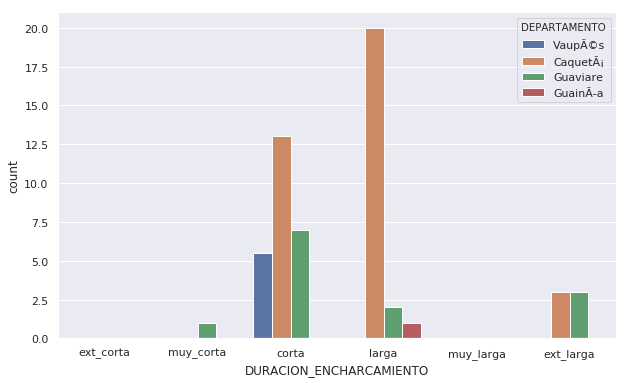

In [80]:
plt.figure (figsize=(10,6))
sns.barplot(x="DURACION_ENCHARCAMIENTO", y="count",data=dur_encha, 
            ci= None, order= ['ext_corta','muy_corta','corta','larga', 'muy_larga', 'ext_larga'], 
            hue= 'DEPARTAMENTO')
plt.close

<function matplotlib.pyplot.close(*args)>

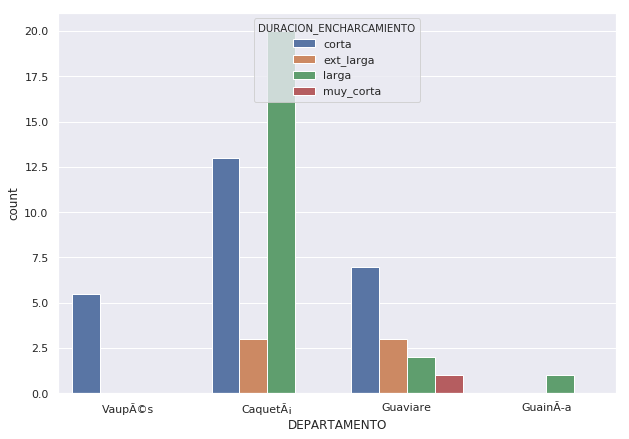

In [81]:
plt.figure (figsize=(10,7))
sns.barplot(x="DEPARTAMENTO", y="count",data=dur_encha, 
            ci= None, 
            hue= 'DURACION_ENCHARCAMIENTO')
plt.close

<h3> CARACTERISTICAS_DIAGNOSTICAS </h3>

In [82]:
#bdp_gen_clean.CARACTERISTICAS_DIAGNOSTICAS

No pude hacer gráficas de esta variable

<h3>CLASIFICACION_TAXONOMICA </h3>

In [83]:
bdp_gen_clean.CLASIFICACION_TAXONOMICA.unique()

array(['typic paleudults', 'typic udorthents', 'typic endoaquents',
       'fluventic endoaquepts', 'typic endoaquepts', 'typic dystrudepts',
       'fluvaquentic eutrudepts', 'typic kandiudults',
       'fluventic dystrudepts', 'typic fluvaquents', 'oxic dystrudepts',
       'aquic dystrudepts', 'lithic udorthents', 'typic haploperox',
       'hydric haplohemists', 'typic udifluvents', 'aeric fluvaquents',
       'fluvaquentic endoaquepts', 'terric haplofibrists',
       'fluventic endoaquents', 'typic quartzipsamments',
       'entic alorthods', 'lithic quartzipsamments', 'lithic dystrudepts',
       'typic kandiperox', 'aeric endoaquents', 'aquic udifluvents',
       'typic hapludults', 'typic psammaquents', 'typic eutrudepts',
       'fluventic eutrudepts', 'aquic kandiudults',
       'fluvaquentic dystrudepts', 'aeric endoaquepts',
       'inceptic hapludox', 'fluventic humudepts', 'aquic eutrudepts',
       'typic humudepts', 'typic kandiudox', 'thapto histic fluvaquents',
      

In [84]:
count_ench = bdp_gen_clean.groupby(['CLASIFICACION_TAXONOMICA', 'DEPARTAMENTO']).size()

In [85]:
clas_taxo= pd.DataFrame(count_ench).reset_index()

In [86]:
clas_taxo= clas_taxo.rename(columns={0: "count"})

In [87]:
clas_taxo= clas_taxo[clas_taxo['count'] > 10]

In [88]:
clas_taxo

,CLASIFICACION_TAXONOMICA,DEPARTAMENTO,count
40,fluventic endoaquepts,Amazonas,15
68,oxic dystrudepts,Amazonas,19
69,oxic dystrudepts,CaquetÃ¡,18
71,oxic dystrudepts,Guaviare,24
72,oxic dystrudepts,VaupÃ©s,15
90,typic dystrudepts,Amazonas,18
91,typic dystrudepts,CaquetÃ¡,22
93,typic dystrudepts,Guaviare,13
116,typic hapludox,Guaviare,24
119,typic hapludults,CaquetÃ¡,11


<function matplotlib.pyplot.close(*args)>

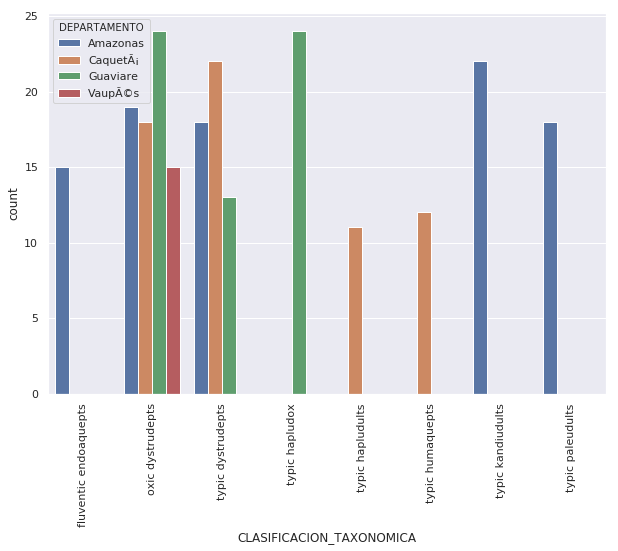

In [89]:
plt.figure (figsize=(10,7))
sns.barplot(x="CLASIFICACION_TAXONOMICA", y="count",data=clas_taxo, ci= None, hue= 'DEPARTAMENTO')
plt.xticks(rotation=90)
plt.close

<function matplotlib.pyplot.close(*args)>

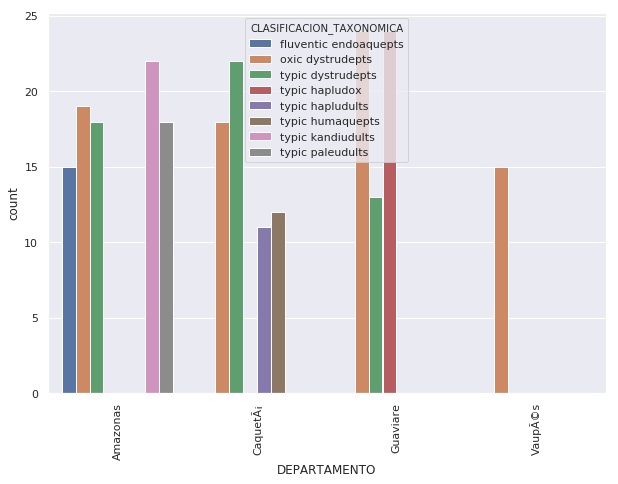

In [90]:
plt.figure (figsize=(10,7))
sns.barplot(x="DEPARTAMENTO", y="count",data=clas_taxo, ci= None, hue= 'CLASIFICACION_TAXONOMICA')
plt.xticks(rotation=90)
plt.close

<h3>pH </h3>

In [91]:
ph_numbers = bdl_clean[bdl_clean['pH (1:1)'] != 'N/M']

In [92]:
ph = ph_numbers.groupby(['pH (1:1)', 'MEMORIA']).size()

In [93]:
ph= pd.DataFrame(ph).reset_index()

In [94]:
ph= pd.DataFrame(ph).reset_index()
ph= ph.rename(columns={0:'count', 'pH (1:1)': 'pH'})                   

In [95]:
ph

,index,pH,MEMORIA,count
0,0,2.2,CAQUETA,1
1,1,2.5,CAQUETA,1
2,2,2.9,VAUPES,1
3,3,3,AMAZONAS,2
4,4,3.1,AMAZONAS,3
5,5,3.1,VAUPES,1
6,6,3.18,VAUPES,1
7,7,3.3,AMAZONAS,4
8,8,3.3,CAQUETA,1
9,9,3.3,VAUPES,2


In [96]:
ph= ph[ph['count'] > 10]

<function matplotlib.pyplot.close(*args)>

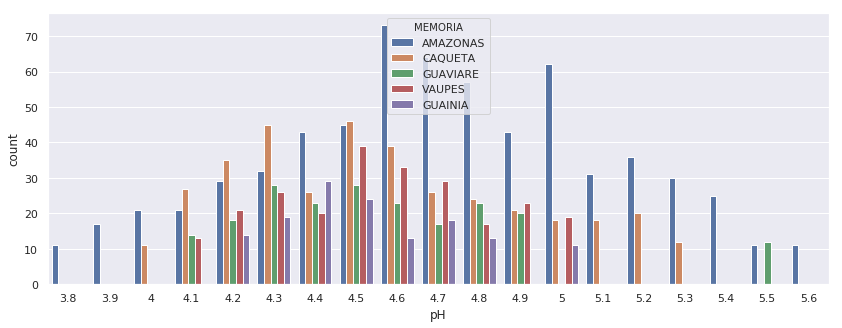

In [97]:
plt.figure (figsize=(14,5))
sns.barplot(x="pH", y="count",data=ph, 
           hue= 'MEMORIA')
plt.close

<function matplotlib.pyplot.close(*args)>

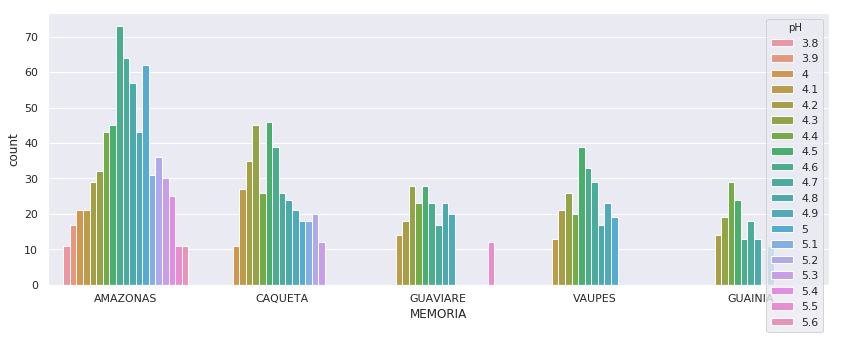

In [98]:
plt.figure (figsize=(14,5))
sns.barplot(x="MEMORIA", y="count",data=ph, 
           hue= 'pH')
plt.close